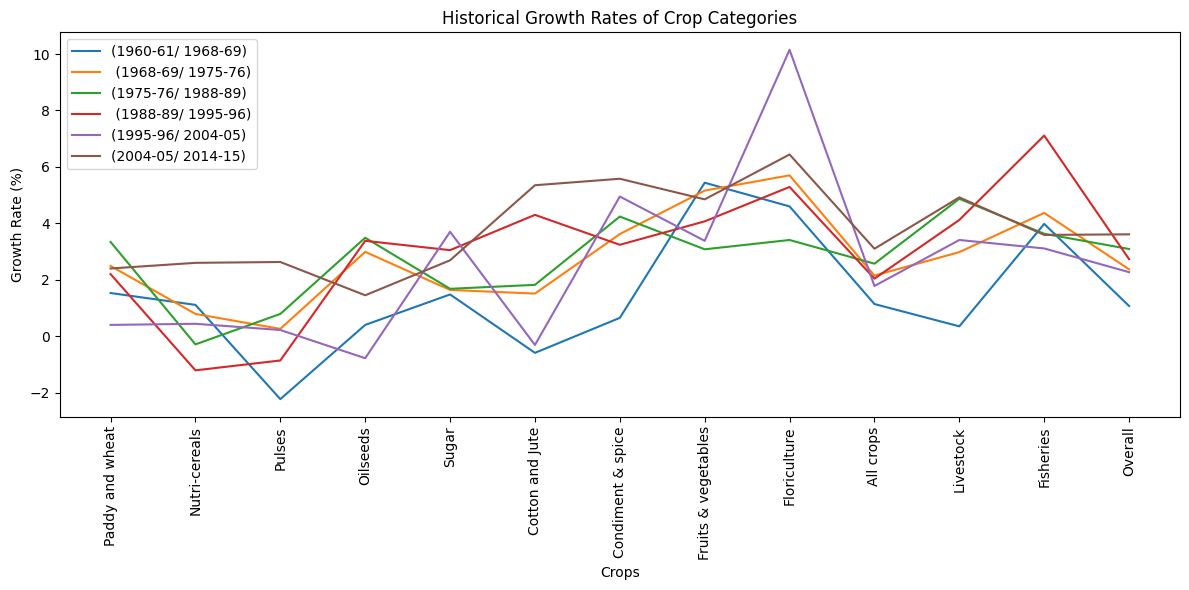

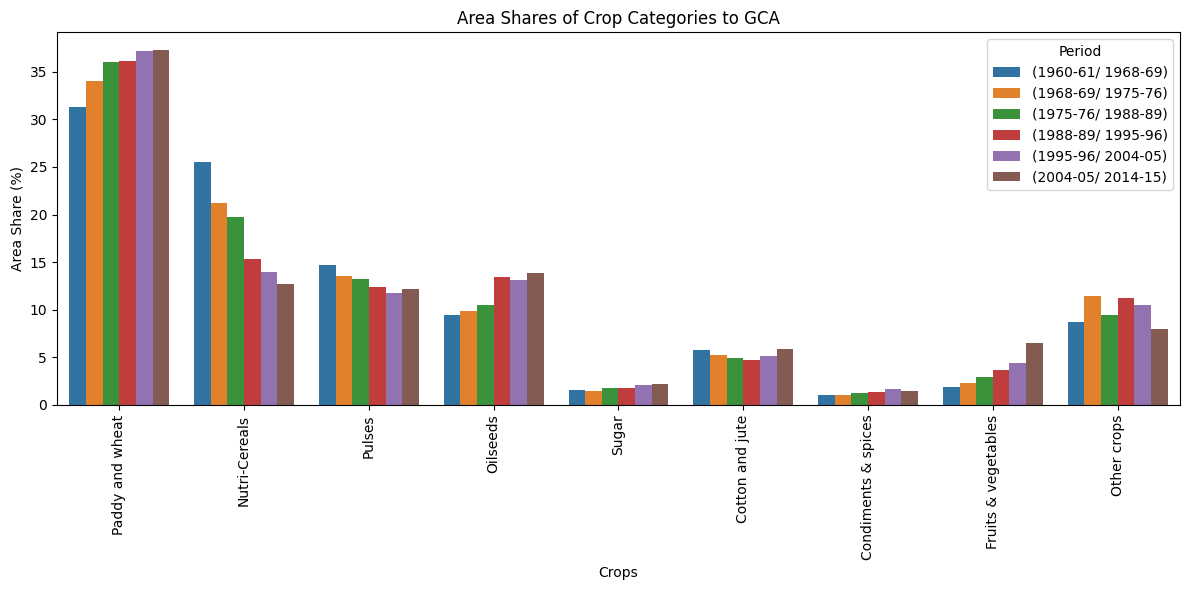

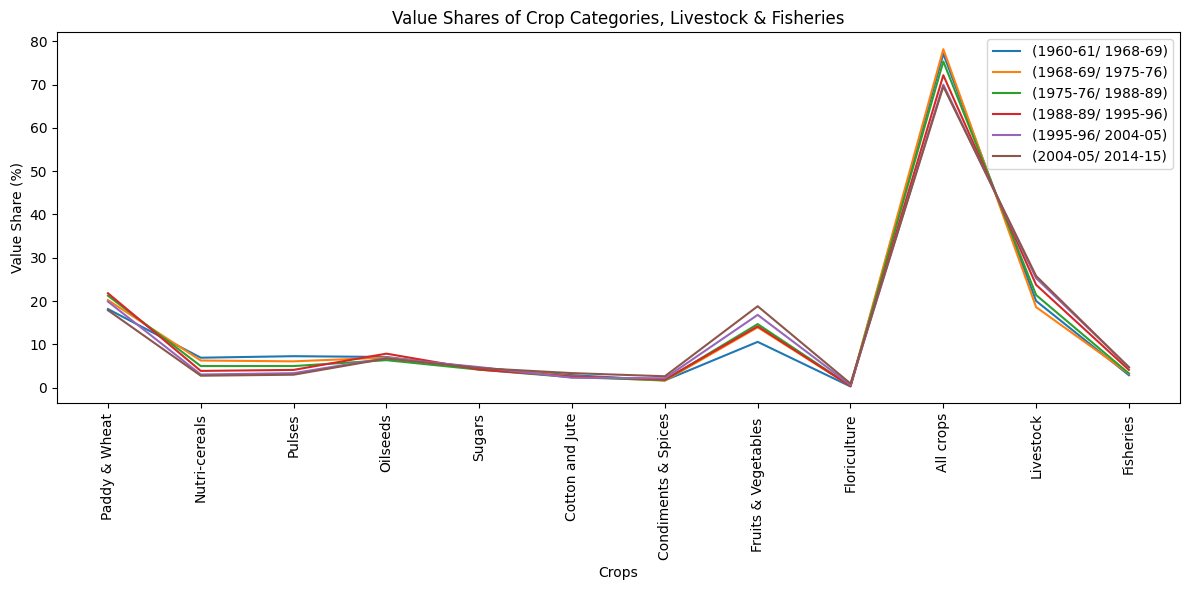

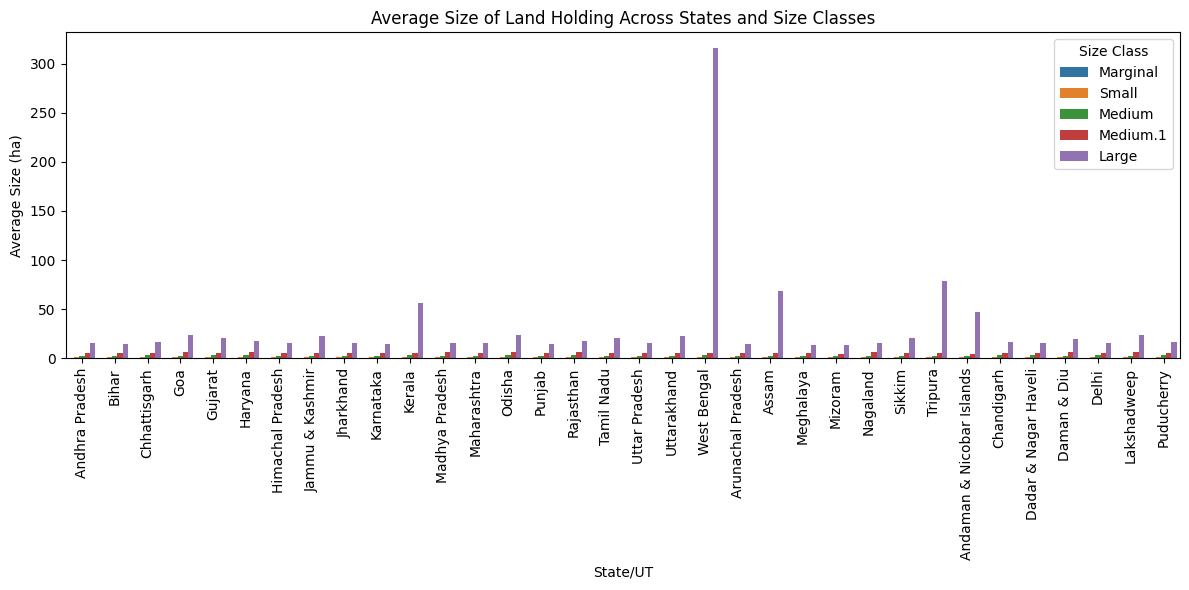

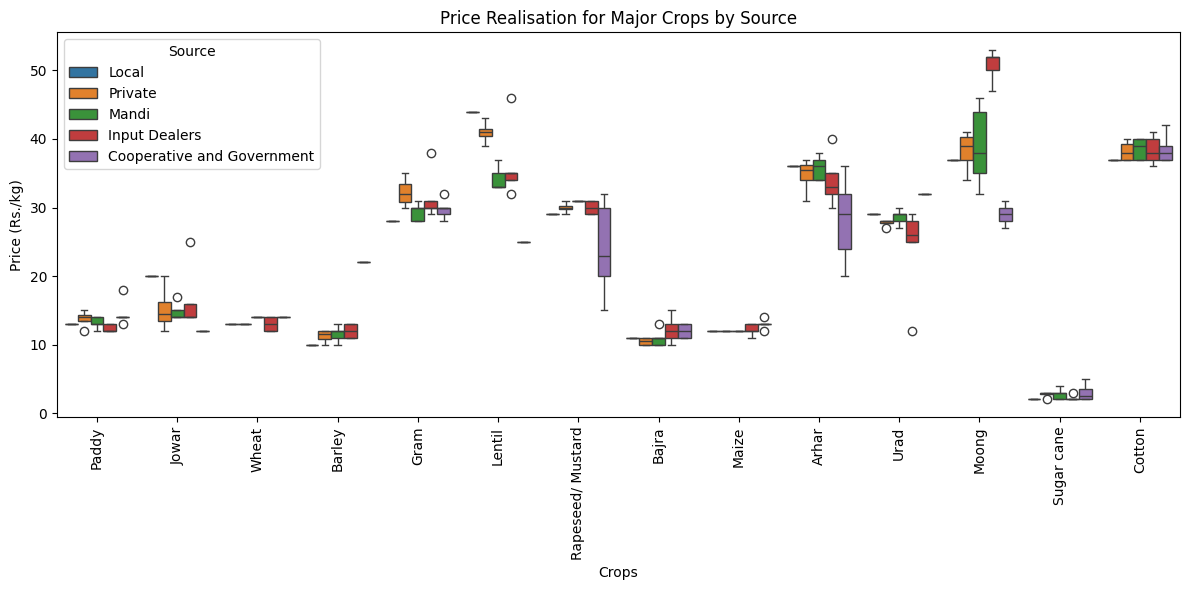

Index(['Crops', '(1960-61/ 1968-69)', '(1968-69/ 1975-76)',
       '(1975-76/ 1988-89)', '(1988-89/ 1995-96)', '(1995-96/ 2004-05)',
       '(2004-05/ 2014-15)'],
      dtype='object')


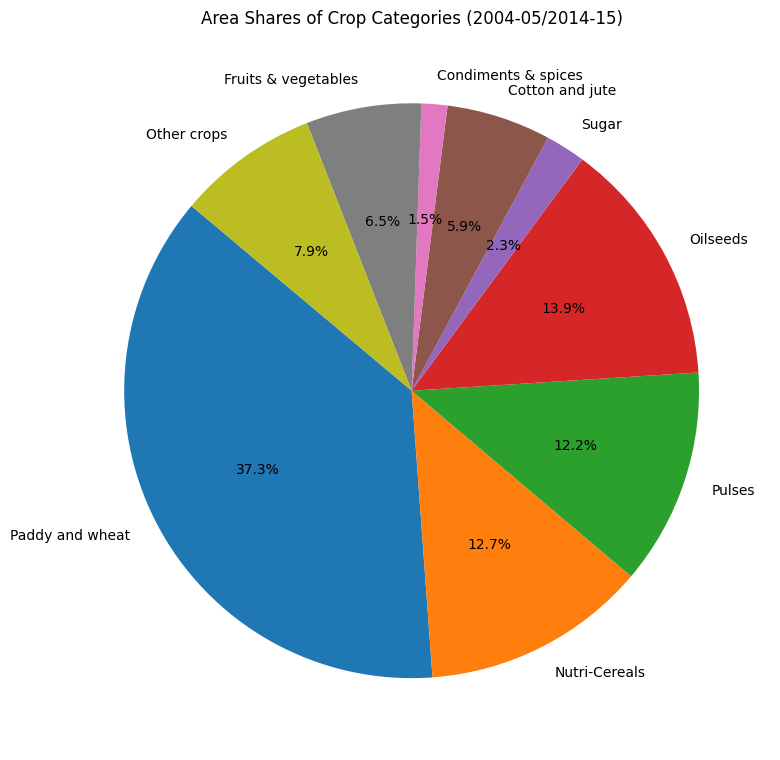

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
growth_rates = pd.read_csv('1.2.csv')
area_shares = pd.read_csv('1.3.csv')
value_shares = pd.read_csv('1.4.csv')
land_holding = pd.read_csv('1.8.csv')
price_realisation_local = pd.read_csv('4.3local.csv')
price_realisation_private = pd.read_csv('4.3private.csv')
price_realisation_mandi = pd.read_csv('4.3mandi.csv')
price_realisation_input = pd.read_csv('4.3inputdealers.csv')
price_realisation_coop = pd.read_csv('4.3coop&govt.csv')

# Ensure 'Crops' column is of type str
growth_rates['Crops'] = growth_rates['Crops'].astype(str)
area_shares['Crops'] = area_shares['Crops'].astype(str)
value_shares['Crops'] = value_shares['Crops'].astype(str)

# Historical Growth Rates of Crop Categories
plt.figure(figsize=(12, 6))
for col in growth_rates.columns[1:]:
    plt.plot(growth_rates['Crops'], growth_rates[col], label=col)
plt.title('Historical Growth Rates of Crop Categories')
plt.xlabel('Crops')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Area Shares of Crop Categories to Gross Cropped Area (GCA)
area_shares_melted = area_shares.melt(id_vars='Crops', var_name='Period', value_name='Area Share')
plt.figure(figsize=(12, 6))
sns.barplot(x='Crops', y='Area Share', hue='Period', data=area_shares_melted)
plt.title('Area Shares of Crop Categories to GCA')
plt.xlabel('Crops')
plt.ylabel('Area Share (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Value Shares of Crop Categories, Livestock & Fisheries
plt.figure(figsize=(12, 6))
for col in value_shares.columns[1:]:
    plt.plot(value_shares['Crops'], value_shares[col], label=col)
plt.title('Value Shares of Crop Categories, Livestock & Fisheries')
plt.xlabel('Crops')
plt.ylabel('Value Share (%)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average Size of Land Holding Across States and Size Classes
land_holding_melted = land_holding.melt(id_vars='State/UT', var_name='Size Class', value_name='Average Size')
plt.figure(figsize=(12, 6))
sns.barplot(x='State/UT', y='Average Size', hue='Size Class', data=land_holding_melted)
plt.title('Average Size of Land Holding Across States and Size Classes')
plt.xlabel('State/UT')
plt.ylabel('Average Size (ha)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Price Realisation for Major Crops
price_realisation = pd.concat([
    price_realisation_local.assign(Source='Local'),
    price_realisation_private.assign(Source='Private'),
    price_realisation_mandi.assign(Source='Mandi'),
    price_realisation_input.assign(Source='Input Dealers'),
    price_realisation_coop.assign(Source='Cooperative and Government')
])
price_realisation_melted = price_realisation.melt(id_vars=['Crops', 'Source'], var_name='Farm Category', value_name='Price (Rs./kg)')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crops', y='Price (Rs./kg)', hue='Source', data=price_realisation_melted)
plt.title('Price Realisation for Major Crops by Source')
plt.xlabel('Crops')
plt.ylabel('Price (Rs./kg)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the column names to verify the correct one for the latest period
print(area_shares.columns)

# Pie Chart: Area Shares of Crop Categories (2004-05/2014-15)
# Make sure to use the exact column name as displayed by the print statement above
latest_area_shares = area_shares.set_index('Crops')['(2004-05/ 2014-15)']

plt.figure(figsize=(8, 8))
plt.pie(latest_area_shares, labels=latest_area_shares.index, autopct='%1.1f%%', startangle=140)
plt.title('Area Shares of Crop Categories (2004-05/2014-15)')
plt.tight_layout()
plt.show()
